In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/donorschoose/Donations.csv
/kaggle/input/donorschoose/Schools.csv
/kaggle/input/donorschoose/Teachers.csv
/kaggle/input/donorschoose/Donors.csv
/kaggle/input/donorschoose/Projects.csv
/kaggle/input/donorschoose/Resources.csv


In [2]:
import pandas as pd
import os

# Définir le chemin vers le dossier
base_path = r"/kaggle/input/donorschoose/"

# Charger les données disponibles (sans la colonne manquante)
donations = pd.read_csv(
    os.path.join(base_path, "Donations.csv"),
    usecols=["Donor ID", "Project ID", "Donation Amount"]
)

donors = pd.read_csv(
    os.path.join(base_path, "Donors.csv"),
    usecols=["Donor ID", "Donor City", "Donor State", "Donor Is Teacher"]
)

projects = pd.read_csv(
    os.path.join(base_path, "Projects.csv"),
    usecols=[
        "Project ID", "School ID", "Teacher ID", "Project Posted Date",
        "Project Subject Category Tree", "Project Grade Level Category",
        "Project Resource Category", "Project Cost"
    ]
)

teachers = pd.read_csv(
    os.path.join(base_path, "Teachers.csv"),
    usecols=["Teacher ID", "Teacher Prefix"]
)

schools = pd.read_csv(
    os.path.join(base_path, "Schools.csv"),
    usecols=["School ID", "School City", "School State", "School Metro Type"]
)

# Fusion
df = donations.merge(donors, on='Donor ID', how='left')
df = df.merge(projects, on='Project ID', how='left')
df = df.merge(teachers, on='Teacher ID', how='left')
df = df.merge(schools, on='School ID', how='left')

# Aperçu du DataFrame fusionné
print(df.head())


                         Project ID                          Donor ID  \
0  000009891526c0ade7180f8423792063  6d5b22d39e68c656071a842732c63a0c   
1  000009891526c0ade7180f8423792063  377944ad61f72d800b25ec1862aec363   
2  000009891526c0ade7180f8423792063  4aaab6d244bf3599682239ed5591af8a   
3  000009891526c0ade7180f8423792063  0b0765dc9c759adc48a07688ba25e94e   
4  000009891526c0ade7180f8423792063  1f4b5b6e68445c6c4a0509b3aca93f38   

   Donation Amount      Donor City Donor State Donor Is Teacher  \
0            25.00  Salt Lake City        Utah              Yes   
1            25.00         Phoenix     Arizona               No   
2            25.00        Riverton        Utah              Yes   
3            20.00        Riverton        Utah               No   
4           178.37     West Jordan        Utah               No   

                          School ID                        Teacher ID  \
0  5aa86a53f658c198fd4e42c541411c76  6d5b22d39e68c656071a842732c63a0c   
1  5aa86a53f

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Load dataset (update path to your actual file)

# 1. Data Cleaning
def clean_data(df):
    # Remove duplicates
    df = df.drop_duplicates()
    
    # Remove rows with missing key values
    df = df.dropna(subset=['Donor ID', 'Donation Amount', 'Project Posted Date'])
    
    # Clean donation amounts
    df['Donation Amount'] = df['Donation Amount'].replace('[\$,]', '', regex=True).astype(float)
    
    # Convert dates
    df['Project Posted Date'] = pd.to_datetime(df['Project Posted Date'], errors='coerce')
    
    # Standardize categoricals
    df['Donor Is Teacher'] = df['Donor Is Teacher'].str.strip().str.title()
    df['Teacher Prefix'] = df['Teacher Prefix'].str.strip().str.replace('.', '')
    
    # Remove unnecessary columns
    cols_to_drop = ['Project ID', 'Donor City', 'School City', 'Teacher Prefix']
    df = df.drop(columns=cols_to_drop, errors='ignore')
    
    return df

cleaned_df = clean_data(df)

In [4]:
cleaned_df.head()

,Donor ID,Donation Amount,Donor State,Donor Is Teacher,School ID,Teacher ID,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,School Metro Type,School State
0,6d5b22d39e68c656071a842732c63a0c,25.00,Utah,Yes,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,Music & The Arts,Grades 6-8,Other,$529.68,2016-05-13,suburban,Utah
1,377944ad61f72d800b25ec1862aec363,25.00,Arizona,No,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,Music & The Arts,Grades 6-8,Other,$529.68,2016-05-13,suburban,Utah
2,4aaab6d244bf3599682239ed5591af8a,25.00,Utah,Yes,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,Music & The Arts,Grades 6-8,Other,$529.68,2016-05-13,suburban,Utah
3,0b0765dc9c759adc48a07688ba25e94e,20.00,Utah,No,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,Music & The Arts,Grades 6-8,Other,$529.68,2016-05-13,suburban,Utah
4,1f4b5b6e68445c6c4a0509b3aca93f38,178.37,Utah,No,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,Music & The Arts,Grades 6-8,Other,$529.68,2016-05-13,suburban,Utah


In [5]:
# 2. Feature Engineering
def engineer_features(df):
    # Sort by donor and date
    df = df.sort_values(['Donor ID', 'Project Posted Date'])

    # Create reference date (1 day after last donation)
    reference_date = df['Project Posted Date'].max() + pd.Timedelta(days=1)

    # Donor-level features
    donor_features = df.groupby('Donor ID').agg(
        total_donations=('Donation Amount', 'count'),
        total_donated=('Donation Amount', 'sum'),
        first_donation_date=('Project Posted Date', 'min'),
        last_donation_date=('Project Posted Date', 'max'),
        unique_teachers=('Teacher ID', 'nunique'),
        unique_subjects=('Project Subject Category Tree', 'nunique'),
        unique_schools=('School ID', 'nunique')
    ).reset_index()

    # Calculate derived features
    donor_features['avg_donation'] = donor_features['total_donated'] / donor_features['total_donations']
    donor_features['donation_frequency'] = donor_features['total_donations'] / (
        (donor_features['last_donation_date'] - donor_features['first_donation_date']).dt.days / 30
    )
    donor_features['days_since_first_donation'] = (reference_date - donor_features['first_donation_date']).dt.days
    donor_features['days_since_last_donation'] = (reference_date - donor_features['last_donation_date']).dt.days
    donor_features['donor_tenure'] = (donor_features['last_donation_date'] - donor_features['first_donation_date']).dt.days

    # Merge donor features back to main dataframe
    df = df.merge(donor_features, on='Donor ID', how='left')

    # Current donation features
    df['donor_is_teacher_binary'] = df['Donor Is Teacher'].map({'Yes': 1, 'No': 0})

    # Time-based features
    df['donation_day_of_week'] = df['Project Posted Date'].dt.dayofweek
    df['donation_month'] = df['Project Posted Date'].dt.month
    df['donation_quarter'] = df['Project Posted Date'].dt.quarter

    # Project cost handling with robust conversion
    if 'Project Cost' in df.columns:
        # Convert to string and clean the column
        df['Project Cost'] = df['Project Cost'].astype(str).replace('[\$,]', '', regex=True)

        # Convert to numeric, coerce errors to NaN
        df['Project Cost'] = pd.to_numeric(df['Project Cost'], errors='coerce')

        # Optionally filter out rows with invalid project costs (you can remove this if you prefer to impute)
        df = df[df['Project Cost'].notna() & (df['Project Cost'] > 0)]

        # Compute amount_vs_project_cost
        df['amount_vs_project_cost'] = df['Donation Amount'] / df['Project Cost']

    # Create donation sequence numbers
    df['donation_sequence'] = df.groupby('Donor ID').cumcount() + 1

    # Calculate days since previous donation
    df['days_since_prev_donation'] = df.groupby('Donor ID')['Project Posted Date'].diff().dt.days
    df['days_since_prev_donation'] = df['days_since_prev_donation'].fillna(0)

    return df

# Apply the function to your cleaned dataframe
engineered_df = engineer_features(cleaned_df)


In [6]:
engineered_df.head()

,Donor ID,Donation Amount,Donor State,Donor Is Teacher,School ID,Teacher ID,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,Project Cost,...,days_since_first_donation,days_since_last_donation,donor_tenure,donor_is_teacher_binary,donation_day_of_week,donation_month,donation_quarter,amount_vs_project_cost,donation_sequence,days_since_prev_donation
0,00000ce845c00cbf0686c992fc369df4,50.00,Illinois,No,7a210fb3b43f58bec5ed0cb7631bb1ce,9344ae7fbb6f1979e992c1cd1d730c49,"Literacy & Language, History & Civics",Grades 3-5,Technology,1975.04,...,1599.0,1599.0,0.0,0,6.0,12.0,4.0,0.025316,1,0.0
1,00002783bc5d108510f3f9666c8b1edd,99.00,other,No,5b6f8411d12fe17ce3dcc597d3f650e9,521c6f95f6a30a6a42a022b7109b7bed,"History & Civics, Applied Learning",Grades 9-12,Trips,1468.24,...,842.0,842.0,0.0,0,0.0,1.0,1.0,0.067428,1,0.0
2,00002d44003ed46b066607c5455a999a,13.75,California,Yes,cb1008a0fb8148dfdbf84444987d6086,4d44850f7ebad79320290c941db5a843,"Math & Science, Applied Learning",Grades PreK-2,Technology,369.64,...,585.0,204.0,381.0,1,5.0,9.0,3.0,0.037198,1,0.0
3,00002d44003ed46b066607c5455a999a,9.69,California,Yes,431038e527c3748bf35bc619dca0f5e1,1b51841df0a479af064e9718328084fe,Music & The Arts,Grades 3-5,Supplies,513.22,...,585.0,204.0,381.0,1,3.0,9.0,3.0,0.018881,2,5.0
4,00002d44003ed46b066607c5455a999a,10.00,California,Yes,5b0794247b1b71da28b2e9cac438b61f,00002d44003ed46b066607c5455a999a,"History & Civics, Literacy & Language",Grades 6-8,Books,555.28,...,585.0,204.0,381.0,1,6.0,10.0,4.0,0.018009,3,24.0


In [7]:
engineered_df.shape


(3629001, 32)

In [8]:
# 3. Prepare Dataset for Classification Model
def prepare_classification_data(df):
    # Create target: 1 if donated again within 365 days
    df = df.sort_values(['Donor ID', 'Project Posted Date'])
    df['next_donation_date'] = df.groupby('Donor ID')['Project Posted Date'].shift(-1)
    df['days_to_next'] = (df['next_donation_date'] - df['Project Posted Date']).dt.days
    df['target_classification'] = (df['days_to_next'] <= 365).astype(int)
    
    # Filter features
    classification_features = [
        'total_donations', 'total_donated', 'avg_donation', 'donation_frequency',
        'days_since_last_donation', 'unique_teachers', 'unique_subjects', 'unique_schools',
        'donor_tenure', 'donor_is_teacher_binary', 'donation_sequence',
        'Project Subject Category Tree', 'Project Grade Level Category',
        'Project Resource Category', 'School Metro Type', 'Donor State',
        'days_since_prev_donation', 'donation_day_of_week', 'donation_month',
        'target_classification'
    ]
    
    # Handle missing target values
    classification_df = df[classification_features].dropna(subset=['target_classification'])
    
    return classification_df

classification_df = prepare_classification_data(engineered_df)

In [9]:
classification_df.head()

,total_donations,total_donated,avg_donation,donation_frequency,days_since_last_donation,unique_teachers,unique_subjects,unique_schools,donor_tenure,donor_is_teacher_binary,donation_sequence,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,School Metro Type,Donor State,days_since_prev_donation,donation_day_of_week,donation_month,target_classification
0,1,50.00,50.00,inf,1599.0,1,1,1,0.0,0,1,"Literacy & Language, History & Civics",Grades 3-5,Technology,suburban,Illinois,0.0,6.0,12.0,0
1,1,99.00,99.00,inf,842.0,1,1,1,0.0,0,1,"History & Civics, Applied Learning",Grades 9-12,Trips,rural,other,0.0,0.0,1.0,0
2,9,508.95,56.55,0.708661,204.0,5,6,6,381.0,1,1,"Math & Science, Applied Learning",Grades PreK-2,Technology,urban,California,0.0,5.0,9.0,1
3,9,508.95,56.55,0.708661,204.0,5,6,6,381.0,1,2,Music & The Arts,Grades 3-5,Supplies,unknown,California,5.0,3.0,9.0,1
4,9,508.95,56.55,0.708661,204.0,5,6,6,381.0,1,3,"History & Civics, Literacy & Language",Grades 6-8,Books,urban,California,24.0,6.0,10.0,1


In [10]:
classification_df.shape

(3629001, 20)

In [11]:
# ========== PREPROCESSING (RUN THIS FIRST) ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import os

# Create output directory
os.makedirs('saved_models', exist_ok=True)

# Load and preprocess data
df = classification_df.copy()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Features & Target
features = [
    'total_donations', 'total_donated', 'avg_donation',
    'donation_frequency', 'days_since_last_donation',
    'donor_tenure', 'donor_is_teacher_binary',
    'donation_sequence', 'days_since_prev_donation',
    'donation_day_of_week', 'donation_month'
]
X = df[features]
y = df['target_classification']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Save scaler
joblib.dump(scaler, 'saved_models/scaler.joblib')
print("Preprocessing complete! Data scaled and split.")

Preprocessing complete! Data scaled and split.



Training Logistic Regression...
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87    379745
           1       0.92      0.77      0.84    346056

    accuracy                           0.86    725801
   macro avg       0.87      0.85      0.86    725801
weighted avg       0.86      0.86      0.86    725801



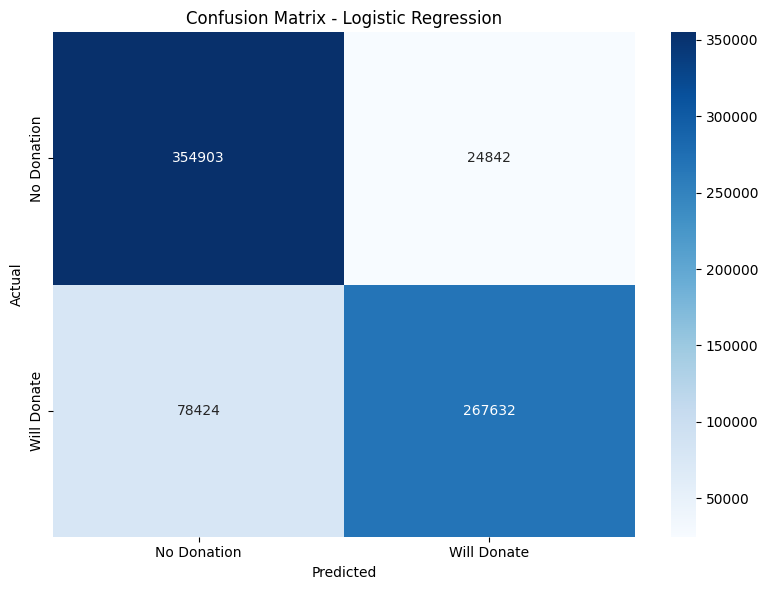

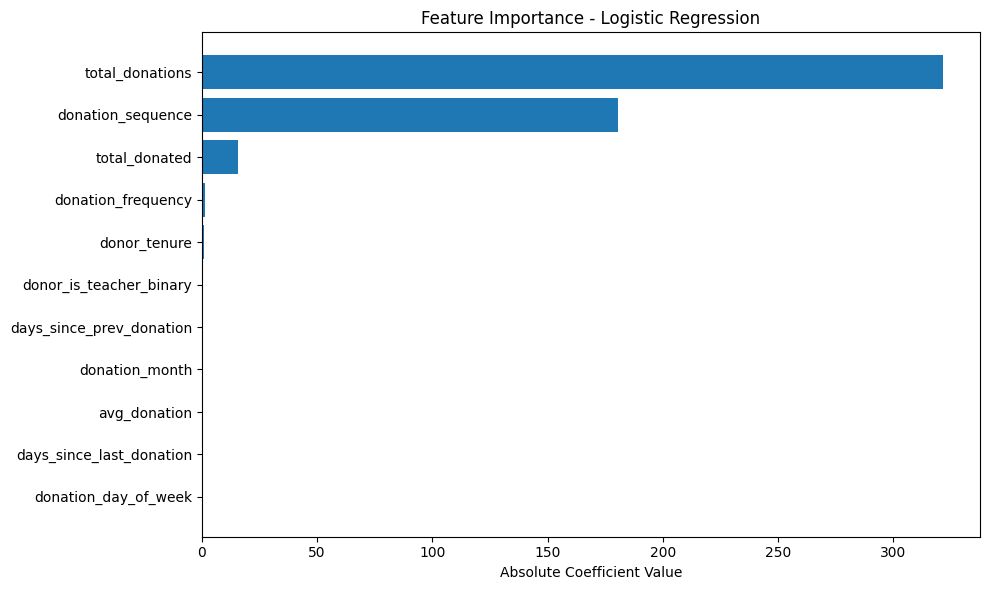

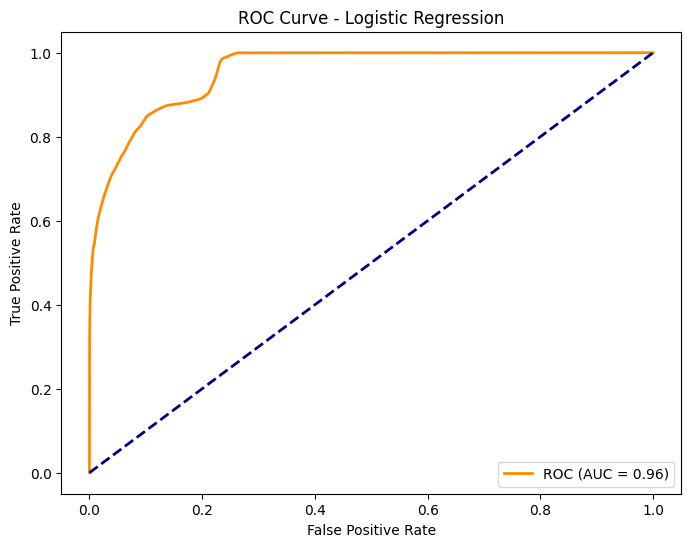

Logistic Regression training complete! Model saved.


In [12]:
# ========== LOGISTIC REGRESSION MODEL ==========
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.calibration import CalibrationDisplay

print("\nTraining Logistic Regression...")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Save model
joblib.dump(log_reg, 'saved_models/logistic_regression.joblib')

# Evaluation report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Donation', 'Will Donate'], 
            yticklabels=['No Donation', 'Will Donate'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature Importance
coef_importance = np.abs(log_reg.coef_[0])
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': coef_importance
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

print("Logistic Regression training complete! Model saved.")


Training Random Forest...
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95    379745
           1       0.92      0.98      0.95    346056

    accuracy                           0.95    725801
   macro avg       0.95      0.95      0.95    725801
weighted avg       0.95      0.95      0.95    725801



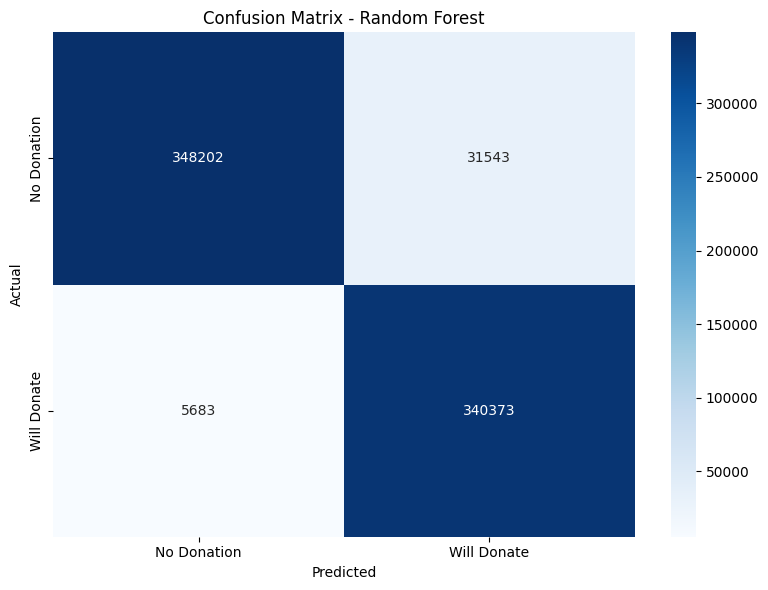

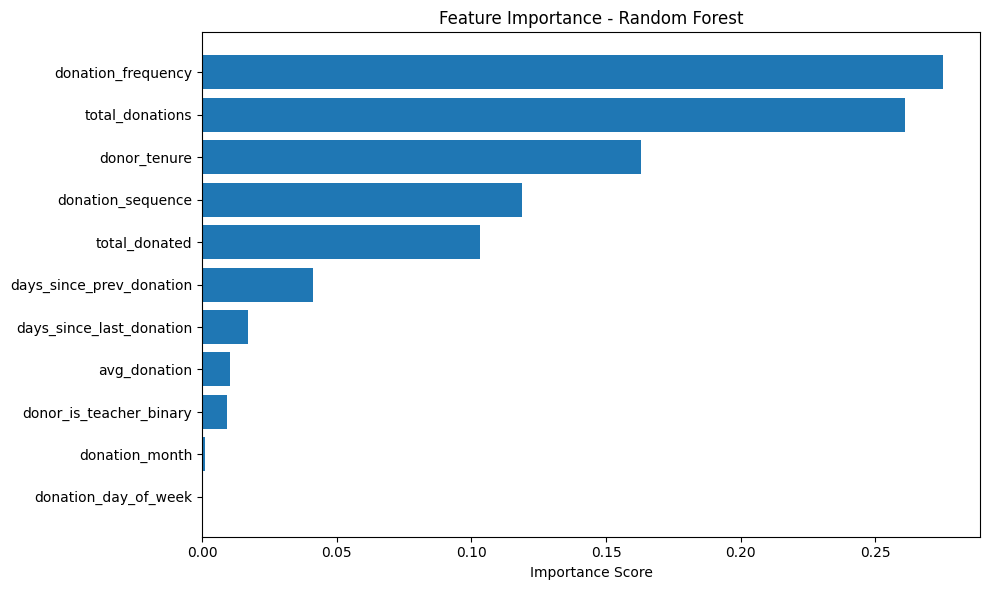

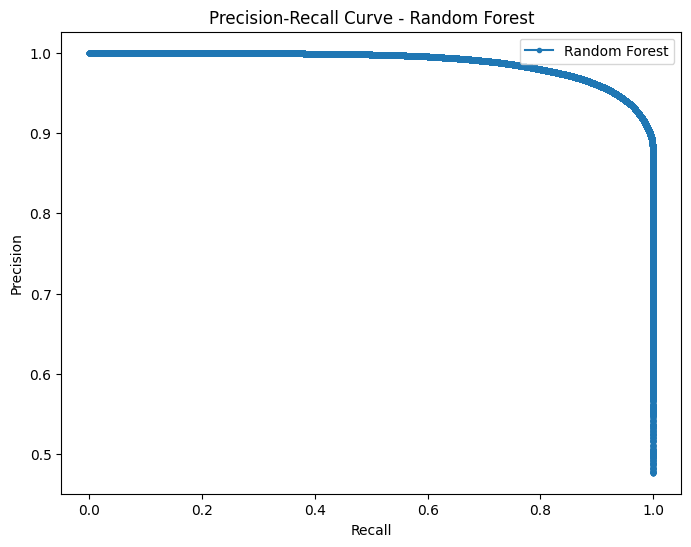

Random Forest training complete! Model saved.


In [13]:
# ========== RANDOM FOREST MODEL ==========
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, RocCurveDisplay

print("\nTraining Random Forest...")
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Save model
joblib.dump(rf, 'saved_models/random_forest.joblib')

# Evaluation report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Donation', 'Will Donate'], 
            yticklabels=['No Donation', 'Will Donate'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature Importance
feat_importances = pd.Series(rf.feature_importances_, index=features)
importance_df = feat_importances.sort_values(ascending=True).reset_index()
importance_df.columns = ['Feature', 'Importance']

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.title('Precision-Recall Curve - Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

print("Random Forest training complete! Model saved.")


Training Neural Network...
Epoch 1/20
72580/72580 ━━━━━━━━━━━━━━━━━━━━ 185s 3ms/step - accuracy: 0.8758 - loss: 0.2811 - val_accuracy: 0.9010 - val_loss: 0.2284
Epoch 2/20
72580/72580 ━━━━━━━━━━━━━━━━━━━━ 172s 2ms/step - accuracy: 0.9051 - loss: 0.2253 - val_accuracy: 0.9124 - val_loss: 0.2103
Epoch 3/20
72580/72580 ━━━━━━━━━━━━━━━━━━━━ 167s 2ms/step - accuracy: 0.9124 - loss: 0.2102 - val_accuracy: 0.9221 - val_loss: 0.1933
Epoch 4/20
72580/72580 ━━━━━━━━━━━━━━━━━━━━ 179s 2ms/step - accuracy: 0.9190 - loss: 0.1972 - val_accuracy: 0.9217 - val_loss: 0.1863
Epoch 5/20
72580/72580 ━━━━━━━━━━━━━━━━━━━━ 221s 3ms/step - accuracy: 0.9245 - loss: 0.1857 - val_accuracy: 0.9307 - val_loss: 0.1710
Epoch 6/20
72580/72580 ━━━━━━━━━━━━━━━━━━━━ 203s 3ms/step - accuracy: 0.9283 - loss: 0.1776 - val_accuracy: 0.9319 - val_loss: 0.1675
Epoch 7/20
72580/72580 ━━━━━━━━━━━━━━━━━━━━ 173s 2ms/step - accuracy: 0.9311 - loss: 0.1713 - val_accuracy: 0.9344 - val_loss: 0.1626
Epoch 8/20
72580/72580 ━━━━━━━━━━━

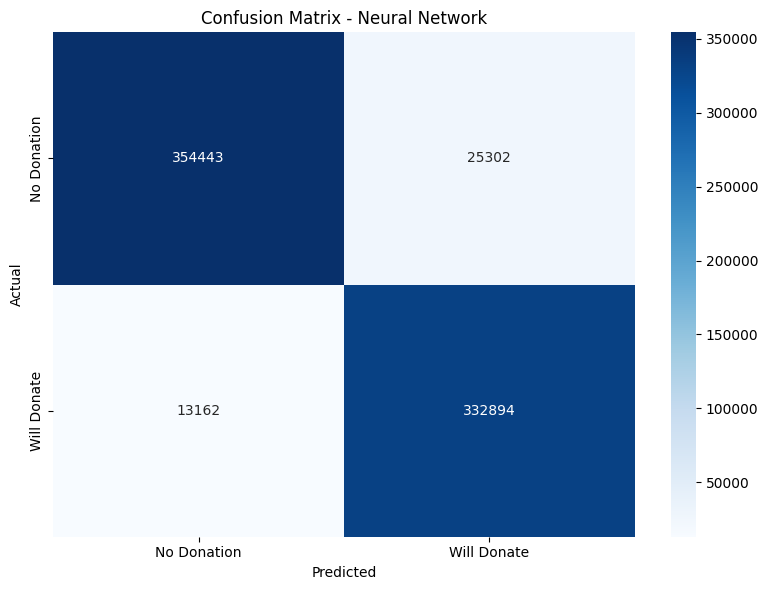

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <Sequential name=sequential_1, built=True> does not.

In [15]:
# ========== NEURAL NETWORK MODEL ==========
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.inspection import permutation_importance

print("\nTraining Neural Network...")
nn = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
history = nn.fit(X_train, y_train, epochs=20, batch_size=32, 
                 validation_split=0.2, verbose=1)

# Save model
save_model(nn, 'saved_models/neural_network.keras')

# Evaluate NN
y_pred_nn = nn.predict(X_test)
y_pred_nn_class = (y_pred_nn > 0.5).astype(int)
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn_class))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_nn_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Donation', 'Will Donate'], 
            yticklabels=['No Donation', 'Will Donate'])
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Permutation Importance
result = permutation_importance(nn, X_test, y_test, n_repeats=5, random_state=42)
perm_importance = result.importances_mean
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': perm_importance
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance - Neural Network (Permutation)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Training History
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History - Neural Network')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

print("Neural Network training complete! Model saved.")


Training XGBoost...
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96    379745
           1       0.93      0.98      0.96    346056

    accuracy                           0.96    725801
   macro avg       0.96      0.96      0.96    725801
weighted avg       0.96      0.96      0.96    725801



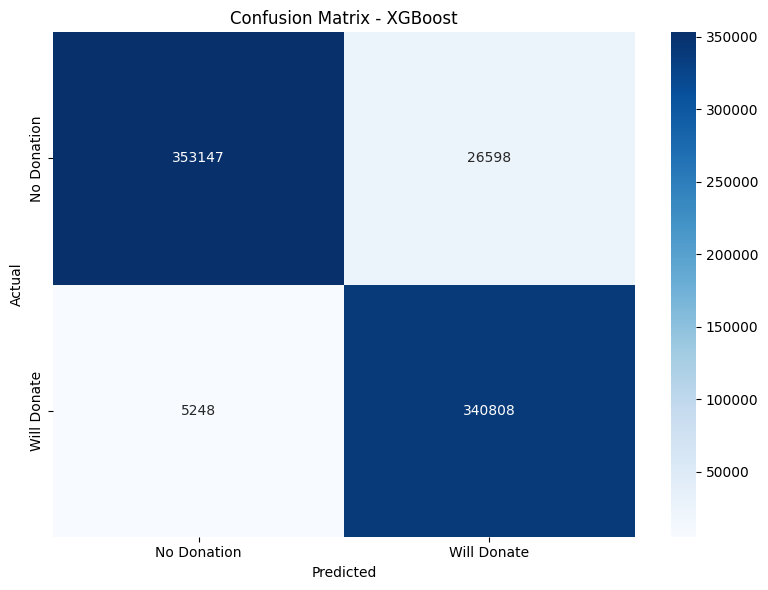

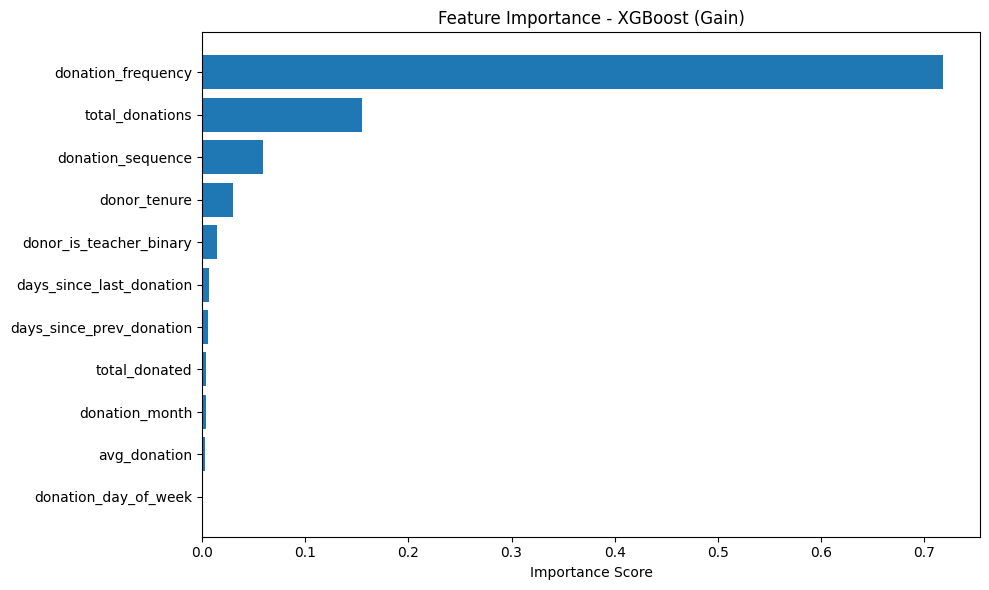

<Figure size 800x600 with 0 Axes>

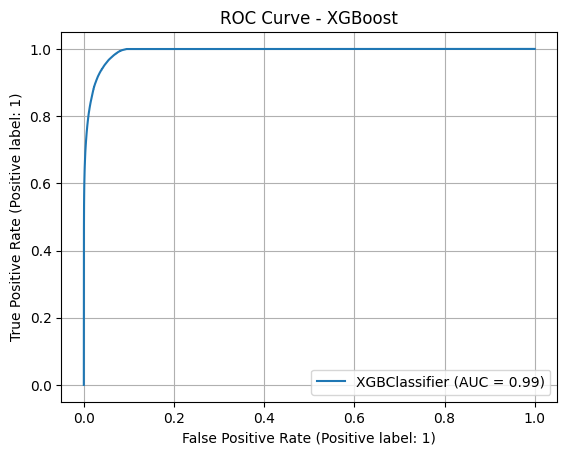

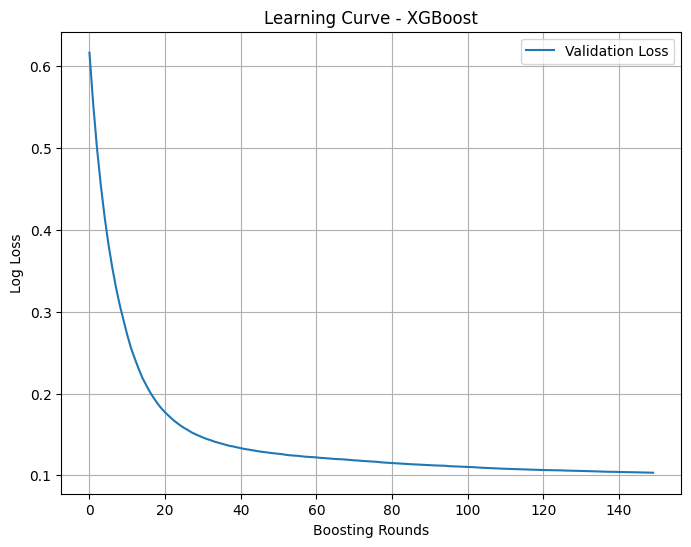

XGBoost training complete! Model saved.


In [16]:
# ========== XGBOOST MODEL ==========
import xgboost as xgb
from sklearn.metrics import RocCurveDisplay

print("\nTraining XGBoost...")
# Handle class imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

xgb_model = xgb.XGBClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False, 
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Save model
xgb_model.save_model('saved_models/xgboost_model.json')

# Evaluation report
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Donation', 'Will Donate'], 
            yticklabels=['No Donation', 'Will Donate'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature Importance
xgb_importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_importances
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance - XGBoost (Gain)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title('ROC Curve - XGBoost')
plt.grid(True)
plt.show()

# Learning Curve
eval_results = xgb_model.evals_result()
plt.figure(figsize=(8, 6))
plt.plot(eval_results['validation_0']['logloss'], label='Validation Loss')
plt.title('Learning Curve - XGBoost')
plt.ylabel('Log Loss')
plt.xlabel('Boosting Rounds')
plt.legend()
plt.grid(True)
plt.show()

print("XGBoost training complete! Model saved.")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


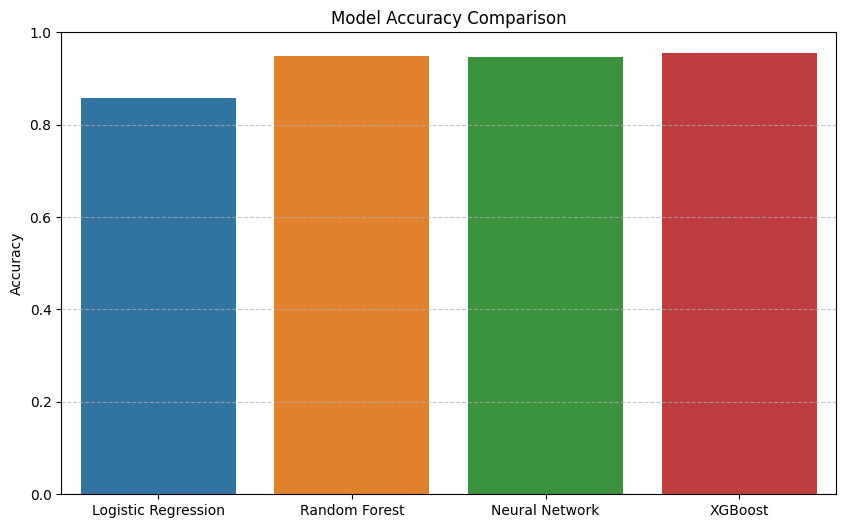

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


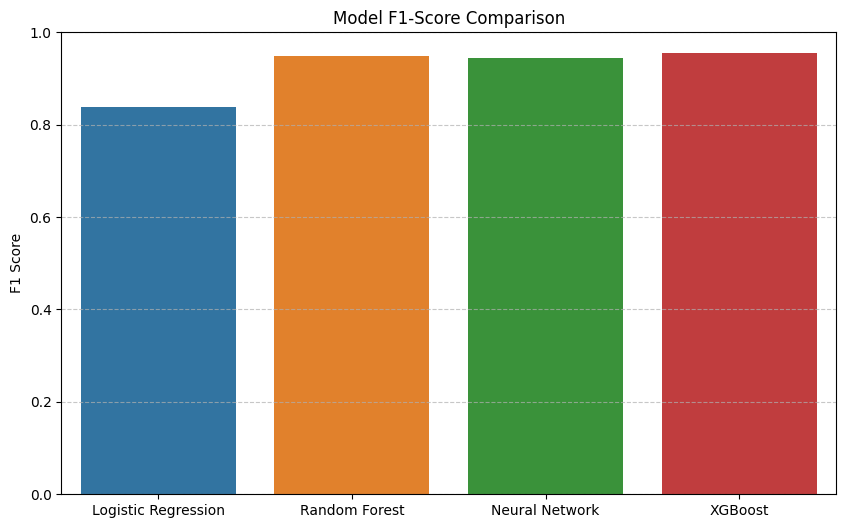


All models saved in 'saved_models' directory:
['scaler.joblib', 'random_forest.joblib', 'xgboost_model.json', 'neural_network.keras', 'logistic_regression.joblib']


In [17]:
# ========== MODEL COMPARISON ==========
from sklearn.metrics import accuracy_score, f1_score

# Load predictions (or use variables if in same session)
models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Neural Network': y_pred_nn_class.flatten(),
    'XGBoost': y_pred_xgb
}

# Compare accuracy
accuracies = [accuracy_score(y_test, pred) for pred in models.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Compare F1-Scores
f1_scores = [f1_score(y_test, pred) for pred in models.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=f1_scores)
plt.title('Model F1-Score Comparison')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nAll models saved in 'saved_models' directory:")
print(os.listdir('saved_models'))

In [18]:
# ========== LOAD AND USE CLASSIFICATION MODELS ==========
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the scaler
scaler = joblib.load('saved_models/scaler.joblib')

# Define the feature names (must match training features)
features = [
    'total_donations', 'total_donated', 'avg_donation',
    'donation_frequency', 'days_since_last_donation',
    'donor_tenure', 'donor_is_teacher_binary',
    'donation_sequence', 'days_since_prev_donation',
    'donation_day_of_week', 'donation_month'
]

# Load all models
models = {
    "Logistic Regression": joblib.load('saved_models/logistic_regression.joblib'),
    "Random Forest": joblib.load('saved_models/random_forest.joblib'),
    "Neural Network": load_model('saved_models/neural_network.keras'),
    "XGBoost": xgb.XGBClassifier()
}
models["XGBoost"].load_model('saved_models/xgboost_model.json')

def predict_donation_propensity(donor_data):
    """
    Predict whether a donor will donate again using all trained models
    Returns predictions, probabilities, and explanations
    """
    # Convert input to DataFrame
    input_df = pd.DataFrame([donor_data])
    
    # Select and order features correctly
    input_df = input_df[features]
    
    # Apply scaling
    input_scaled = scaler.transform(input_df)
    
    results = {}
    
    for model_name, model in models.items():
        # Make prediction
        if model_name == "Neural Network":
            proba = model.predict(input_scaled)[0][0]
            prediction = 1 if proba > 0.5 else 0
        else:
            proba = model.predict_proba(input_scaled)[0][1]
            prediction = model.predict(input_scaled)[0]
        
        # Get explanation
        explanation = "Likely to donate again" if prediction == 1 else "Unlikely to donate again"
        confidence = "High confidence" if proba > 0.7 or proba < 0.3 else "Medium confidence"
        
        results[model_name] = {
            "prediction": prediction,
            "probability": proba,
            "explanation": explanation,
            "confidence": confidence
        }
    
    return results

# Example donor data (replace with actual donor features)
sample_donor = {
    'total_donations': 8,
    'total_donated': 1200,
    'avg_donation': 150,
    'donation_frequency': 0.4,
    'days_since_last_donation': 45,
    'donor_tenure': 540,
    'donor_is_teacher_binary': 1,
    'donation_sequence': 3,
    'days_since_prev_donation': 60,
    'donation_day_of_week': 4,
    'donation_month': 7
}

# Get predictions
predictions = predict_donation_propensity(sample_donor)

# Display results
print("Donation Propensity Predictions:")
print("=" * 50)
for model_name, result in predictions.items():
    print(f"\n{model_name}:")
    print(f"- Prediction: {'Will donate again' if result['prediction'] == 1 else 'Will NOT donate again'}")
    print(f"- Probability: {result['probability']:.4f}")
    print(f"- Explanation: {result['explanation']}")
    print(f"- Confidence: {result['confidence']}")

# Feature importance analysis
print("\n\nFeature Importance Analysis:")
print("=" * 50)
print("Key factors influencing donation propensity:")

# Get feature importances from Random Forest (as an example)
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nTop influential factors (from Random Forest model):")
for i, row in feature_importance_df.head(5).iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.4f}")

# Generate recommendations
print("\nRecommendations to improve donation likelihood:")
print("- Increase donation frequency through regular engagement")
print("- Send targeted campaigns 30-60 days after last donation")
print("- Recognize long-term donors with special acknowledgments")
print("- Optimize donation timing (weekdays vs weekends)")
print("- Personalize asks based on donor's giving history")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Donation Propensity Predictions:

Logistic Regression:
- Prediction: Will donate again
- Probability: 0.8612
- Explanation: Likely to donate again
- Confidence: High confidence

Random Forest:
- Prediction: Will donate again
- Probability: 0.9175
- Explanation: Likely to donate again
- Confidence: High confidence

Neural Network:
- Prediction: Will donate again
- Probability: 0.9785
- Explanation: Likely to donate again
- Confidence: High confidence

XGBoost:
- Prediction: Will donate again
- Probability: 0.9487
- Explanation: Likely to donate again
- Confidence: High confidence


Feature Importance Analysis:
Key factors influencing donation propensity:

Top influential factors (from Random Forest model):
- donation_frequency: 0.2751
- total_donations: 0.2610
- donor_tenure: 0.1629
- donation_sequence: 0.1188
- total_donated: 0.1033

Recommendations to improve donation likelihood:
- Increase donation frequency through regular engagement
- Send tar